In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
module_path = os.path.abspath(os.path.join('../../../src/'))
if module_path not in sys.path:
    sys.path.append(module_path)

# Experiments

Here we showcase 3 types of experiments:

* **Hyperparameter optimization** for training of a model (*using Optuna*) **[not ready yet]**

* **Adversarial Training** of a model for different hyperparameters

* Evaluation of **Adversarial Attacks**


Preconditions:

* you need a ***PL-Module*** that specifies your model class and dataset!

# Training of a Model

* define your hyperparameters in `hparams`
* create your instance of `PLModule`
* define a trainer (e.g., define max epochs, ...)
* fit your model!

In [2]:
import numpy as np
import torch
import pytorch_lightning as pl
from pytorch_lightning import loggers
import config

In [3]:
from classification.models.M5 import M5, M5PLModule

hparams = {
    "batch_size": 64,
    "learning_rate": 3e-4,
    "weight_decay": 0.001,
    "lr_decay": 0.95
}

model = M5PLModule(hparams)
model.prepare_data()

Loading cached train data from /nfs/students/summer-term-2020/project-4/data/data_8k
Loading cached val data from /nfs/students/summer-term-2020/project-4/data/data_8k


In [4]:
trainer = pl.Trainer(
    max_epochs = 2,
    logger = loggers.TensorBoardLogger(config.LOG_DIR, name="M5"),
    gpus = 1 if torch.cuda.is_available() else None,
    log_gpu_memory = 'all'
)

trainer.fit(model)

GPU available: True, used: True
No environment variable for node rank defined. Set as 0.
CUDA_VISIBLE_DEVICES: [0]
/nfs/homedirs/herrmanp/miniconda3/envs/ml/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: RuntimeWarning: You have defined a `val_dataloader()` and have defined a `validation_step()`, you may also want to define `validation_epoch_end()` for accumulating stats.
  warnings.warn(*args, **kwargs)


Loading cached train data from /nfs/students/summer-term-2020/project-4/data/data_8k
Loading cached val data from /nfs/students/summer-term-2020/project-4/data/data_8k


Set SLURM handle signals.

   | Name           | Type         | Params
--------------------------------------------
0  | model          | M5           | 555 K 
1  | model.model    | Sequential   | 555 K 
2  | model.model.0  | Conv1d       | 10 K  
3  | model.model.1  | BatchNorm1d  | 256   
4  | model.model.2  | MaxPool1d    | 0     
5  | model.model.3  | Dropout      | 0     
6  | model.model.4  | Conv1d       | 49 K  
7  | model.model.5  | BatchNorm1d  | 256   
8  | model.model.6  | MaxPool1d    | 0     
9  | model.model.7  | Dropout      | 0     
10 | model.model.8  | Conv1d       | 98 K  
11 | model.model.9  | BatchNorm1d  | 512   
12 | model.model.10 | MaxPool1d    | 0     
13 | model.model.11 | Dropout      | 0     
14 | model.model.12 | Conv1d       | 393 K 
15 | model.model.13 | BatchNorm1d  | 1 K   
16 | model.model.14 | MaxPool1d    | 0     
17 | model.model.15 | AvgPool1d    | 0     
18 | model.model.16 | PermuteLayer | 0     
19 | model.model.17 | Linear       | 1 K   
/nfs

Val-Acc=0.03793716656787196


/nfs/homedirs/herrmanp/miniconda3/envs/ml/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.8174273858921162


Val-Acc=0.8156490812092472



1

# II: Adversarial Training

* same as normal training, but call **`model.setAttack`** 

In [5]:
from attacks.pgd import ProjectedGradientDescent

attack_args = [{"norm": "2", "epsilon": 15}]

def adv_train(attack_args):
    for i in range(len(attack_args)):
        model = M5PLModule(hparams)
        model.prepare_data()
        model.setAttack(ProjectedGradientDescent, attack_args[i])

        trainer = pl.Trainer(
            max_epochs=3,
            logger= loggers.TensorBoardLogger(config.LOG_DIR, name="M5"),
            gpus=1 if torch.cuda.is_available() else None,
            log_gpu_memory='all'
        )
        trainer.fit(model)

        torch.save( {"state_dict": model.model.state_dict(), "hparams": model.hparams, "attack_args": attack_args[i]}, "2first_search_{}.pt".format(i))


adv_train(attack_args)

Loading cached train data from /nfs/students/summer-term-2020/project-4/data/data_8k
Loading cached val data from /nfs/students/summer-term-2020/project-4/data/data_8k


GPU available: True, used: True
No environment variable for node rank defined. Set as 0.
CUDA_VISIBLE_DEVICES: [0]
/nfs/homedirs/herrmanp/miniconda3/envs/ml/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: RuntimeWarning: You have defined a `val_dataloader()` and have defined a `validation_step()`, you may also want to define `validation_epoch_end()` for accumulating stats.
  warnings.warn(*args, **kwargs)


Loading cached train data from /nfs/students/summer-term-2020/project-4/data/data_8k
Loading cached val data from /nfs/students/summer-term-2020/project-4/data/data_8k


Set SLURM handle signals.

   | Name           | Type         | Params
--------------------------------------------
0  | model          | M5           | 555 K 
1  | model.model    | Sequential   | 555 K 
2  | model.model.0  | Conv1d       | 10 K  
3  | model.model.1  | BatchNorm1d  | 256   
4  | model.model.2  | MaxPool1d    | 0     
5  | model.model.3  | Dropout      | 0     
6  | model.model.4  | Conv1d       | 49 K  
7  | model.model.5  | BatchNorm1d  | 256   
8  | model.model.6  | MaxPool1d    | 0     
9  | model.model.7  | Dropout      | 0     
10 | model.model.8  | Conv1d       | 98 K  
11 | model.model.9  | BatchNorm1d  | 512   
12 | model.model.10 | MaxPool1d    | 0     
13 | model.model.11 | Dropout      | 0     
14 | model.model.12 | Conv1d       | 393 K 
15 | model.model.13 | BatchNorm1d  | 1 K   
16 | model.model.14 | MaxPool1d    | 0     
17 | model.model.15 | AvgPool1d    | 0     
18 | model.model.16 | PermuteLayer | 0     
19 | model.model.17 | Linear       | 1 K   
/nfs

Val-Acc=0.03793716656787196


/nfs/homedirs/herrmanp/miniconda3/envs/ml/lib/python3.8/site-packages/pytorch_lightning/utilities/distributed.py:23: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` in the `DataLoader` init to improve performance.
  warnings.warn(*args, **kwargs)


Val-Acc=0.8085358624777712


Val-Acc=0.8026081802015412


Val-Acc=0.8032009484291642



# III: Robustness Evaluation

Running a single attack:

In [6]:
from attacks.pgd import ProjectedGradientDescent
attack = ProjectedGradientDescent(model.model, model.train_dataloader(), {"norm":"inf", "epsilon": 10.}, early_stopping=-1, device='cuda', save_samples=False)
attack.attack()
attack.report( )

100%|██████████| 80/80 [00:11<00:00,  7.26it/s]


Attack-Parameters:	{'norm': 'inf', 'epsilon': 10.0}
Early stopping: 	False (-1)

Successfully attacked:	4096
Total attacked: 	4096
Total processed:	5060

Success-Rate: 		1.0
Perturbed Accurracy: 	0.0


{'success_rate': 1.0}

### Documentation
* you define an experiment: an object of class `utils.RobustnessExperiment`.
    * pass a title & description for the experiment (optional)
    * pass different attacks + a list of configs, e.g.    
    
```python

exp_config = [           
              {
               "attack_fn": fast_gradient_attack, 
               "attack_arg": {"norm":["inf"], "epsilon": [0, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1]},
               "meta": {"key_result":"acc", "key_config":"epsilon", "title":"FGSM"}
              }
            ]
```

* all values in `attack_arg` must be in brackets. The attack will the be run for all of the values in each of the lists

* you then can **run** the experiment by passing a **model**
* the following will happen:
    * initializing of the experiment creates a folder in the dir specified in config, named ID_title. Also a pickle file will be saved to the directory.
    * if you run an attack:
        * a sub-folder in that directory will be created for the model.
        * all attacks will be ran
        * for every attack, a plot will be created
        * one json (i.e. one for each model) will be saved to the directory
        * also some samples are stored for each attack.

/nfs/homedirs/herrmanp/miniconda3/envs/ml/lib/python3.8/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit
/nfs/homedirs/herrmanp/miniconda3/envs/ml/lib/python3.8/site-packages/librosa/util/decorators.py:9: NumbaDeprecationWarning: An import was requested from a module that has moved location.
Import of 'jit' requested from: 'numba.decorators', please update to use 'numba.core.decorators' or pin to Numba version 0.48.0. This alias will not be present in Numba version 0.50.0.
  from numba.decorators import jit as optional_jit


Created Dir '/nfs/students/summer-term-2020/project-4/experiments/0036_Test'
Loading cached train data from /nfs/students/summer-term-2020/project-4/data/data_8k
Loading cached val data from /nfs/students/summer-term-2020/project-4/data/data_8k


  0%|          | 0/12 [00:00<?, ?it/s]

Created Dir '/nfs/students/summer-term-2020/project-4/experiments/0036_Test/adv_totaly_hig_50epochs.pt'
Perform Attack #1/3: FGSM


  8%|▊         | 1/12 [00:08<01:32,  8.41s/it]

Attack-Parameters:	{'norm': 'inf', 'epsilon': 0}
Early stopping: 	False (-1)

Successfully attacked:	0
Total attacked: 	1356
Total processed:	1687

Success-Rate: 		0.0
Perturbed Accurracy: 	0.8


 17%|█▋        | 2/12 [00:12<01:10,  7.07s/it]

Attack-Parameters:	{'norm': 'inf', 'epsilon': 0.0001}
Early stopping: 	False (-1)

Successfully attacked:	4
Total attacked: 	1356
Total processed:	1687

Success-Rate: 		0.0
Perturbed Accurracy: 	0.8


  0%|          | 0/27 [00:00<?, ?it/s].57s/it]

Attack-Parameters:	{'norm': 'inf', 'epsilon': 0.0002}
Early stopping: 	False (-1)

Successfully attacked:	7
Total attacked: 	1356
Total processed:	1687

Success-Rate: 		0.01
Perturbed Accurracy: 	0.8


  0%|          | 0/27 [00:00<?, ?it/s].42s/it]

Attack-Parameters:	{'norm': 'inf', 'epsilon': 0.0005}
Early stopping: 	False (-1)

Successfully attacked:	18
Total attacked: 	1356
Total processed:	1687

Success-Rate: 		0.01
Perturbed Accurracy: 	0.79


 42%|████▏     | 5/12 [00:28<00:39,  5.61s/it]

Attack-Parameters:	{'norm': 'inf', 'epsilon': 0.01}
Early stopping: 	False (-1)

Successfully attacked:	232
Total attacked: 	1356
Total processed:	1687

Success-Rate: 		0.17
Perturbed Accurracy: 	0.67


 50%|█████     | 6/12 [00:32<00:30,  5.09s/it]

Attack-Parameters:	{'norm': 'inf', 'epsilon': 0.02}
Early stopping: 	False (-1)

Successfully attacked:	368
Total attacked: 	1356
Total processed:	1687

Success-Rate: 		0.27
Perturbed Accurracy: 	0.59


 58%|█████▊    | 7/12 [00:36<00:23,  4.75s/it]

Attack-Parameters:	{'norm': 'inf', 'epsilon': 0.05}
Early stopping: 	False (-1)

Successfully attacked:	546
Total attacked: 	1356
Total processed:	1687

Success-Rate: 		0.4
Perturbed Accurracy: 	0.48


 67%|██████▋   | 8/12 [00:40<00:18,  4.52s/it]

Attack-Parameters:	{'norm': 'inf', 'epsilon': 0.1}
Early stopping: 	False (-1)

Successfully attacked:	661
Total attacked: 	1356
Total processed:	1687

Success-Rate: 		0.49
Perturbed Accurracy: 	0.41


  0%|          | 0/27 [00:00<?, ?it/s].33s/it]

Attack-Parameters:	{'norm': 'inf', 'epsilon': 0.2}
Early stopping: 	False (-1)

Successfully attacked:	817
Total attacked: 	1356
Total processed:	1687

Success-Rate: 		0.6
Perturbed Accurracy: 	0.32


  0%|          | 0/27 [00:00<?, ?it/s]4.16s/it]

Attack-Parameters:	{'norm': 'inf', 'epsilon': 0.5}
Early stopping: 	False (-1)

Successfully attacked:	1022
Total attacked: 	1356
Total processed:	1687

Success-Rate: 		0.75
Perturbed Accurracy: 	0.2


 92%|█████████▏| 11/12 [00:51<00:04,  4.04s/it]

Attack-Parameters:	{'norm': 'inf', 'epsilon': 1}
Early stopping: 	False (-1)

Successfully attacked:	793
Total attacked: 	1356
Total processed:	1687

Success-Rate: 		0.58
Perturbed Accurracy: 	0.33


100%|██████████| 12/12 [00:55<00:00,  4.64s/it]


Attack-Parameters:	{'norm': 'inf', 'epsilon': 10}
Early stopping: 	False (-1)

Successfully attacked:	688
Total attacked: 	1356
Total processed:	1687

Success-Rate: 		0.51
Perturbed Accurracy: 	0.4


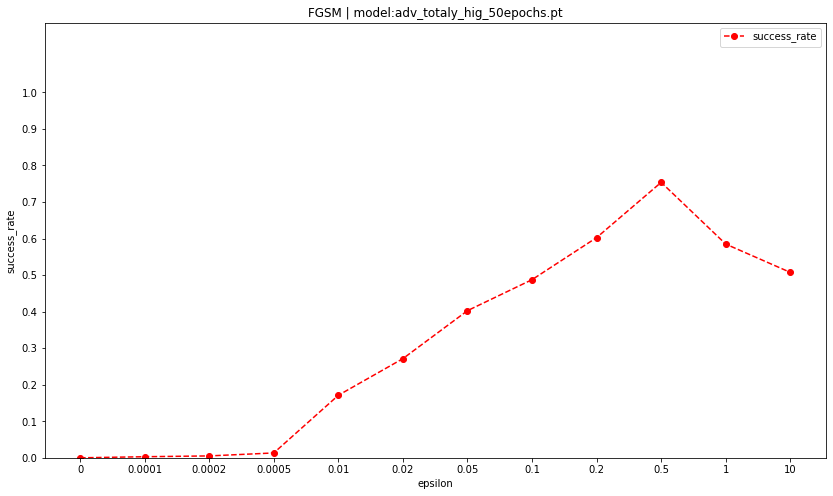

  0%|          | 0/11 [00:00<?, ?it/s]

Perform Attack #2/3: FGA L2


  9%|▉         | 1/11 [00:03<00:39,  3.94s/it]

Attack-Parameters:	{'norm': '2', 'epsilon': 0}
Early stopping: 	False (-1)

Successfully attacked:	0
Total attacked: 	1356
Total processed:	1687

Success-Rate: 		0.0
Perturbed Accurracy: 	0.8


  0%|          | 0/27 [00:00<?, ?it/s].92s/it]

Attack-Parameters:	{'norm': '2', 'epsilon': 1}
Early stopping: 	False (-1)

Successfully attacked:	120
Total attacked: 	1356
Total processed:	1687

Success-Rate: 		0.09
Perturbed Accurracy: 	0.73


 27%|██▋       | 3/11 [00:11<00:30,  3.87s/it]

Attack-Parameters:	{'norm': '2', 'epsilon': 2}
Early stopping: 	False (-1)

Successfully attacked:	220
Total attacked: 	1356
Total processed:	1687

Success-Rate: 		0.16
Perturbed Accurracy: 	0.67


  0%|          | 0/27 [00:00<?, ?it/s].91s/it]

Attack-Parameters:	{'norm': '2', 'epsilon': 5}
Early stopping: 	False (-1)

Successfully attacked:	407
Total attacked: 	1356
Total processed:	1687

Success-Rate: 		0.3
Perturbed Accurracy: 	0.56


 45%|████▌     | 5/11 [00:19<00:23,  3.88s/it]

Attack-Parameters:	{'norm': '2', 'epsilon': 10}
Early stopping: 	False (-1)

Successfully attacked:	570
Total attacked: 	1356
Total processed:	1687

Success-Rate: 		0.42
Perturbed Accurracy: 	0.47


  0%|          | 0/27 [00:00<?, ?it/s].90s/it]

Attack-Parameters:	{'norm': '2', 'epsilon': 20}
Early stopping: 	False (-1)

Successfully attacked:	717
Total attacked: 	1356
Total processed:	1687

Success-Rate: 		0.53
Perturbed Accurracy: 	0.38


  0%|          | 0/27 [00:00<?, ?it/s].86s/it]

Attack-Parameters:	{'norm': '2', 'epsilon': 50}
Early stopping: 	False (-1)

Successfully attacked:	933
Total attacked: 	1356
Total processed:	1687

Success-Rate: 		0.69
Perturbed Accurracy: 	0.25


  0%|          | 0/27 [00:00<?, ?it/s].85s/it]

Attack-Parameters:	{'norm': '2', 'epsilon': 100}
Early stopping: 	False (-1)

Successfully attacked:	1108
Total attacked: 	1356
Total processed:	1687

Success-Rate: 		0.82
Perturbed Accurracy: 	0.15


  0%|          | 0/27 [00:00<?, ?it/s].84s/it]

Attack-Parameters:	{'norm': '2', 'epsilon': 200}
Early stopping: 	False (-1)

Successfully attacked:	1161
Total attacked: 	1356
Total processed:	1687

Success-Rate: 		0.86
Perturbed Accurracy: 	0.12


  0%|          | 0/27 [00:00<?, ?it/s]3.82s/it]

Attack-Parameters:	{'norm': '2', 'epsilon': 500}
Early stopping: 	False (-1)

Successfully attacked:	830
Total attacked: 	1356
Total processed:	1687

Success-Rate: 		0.61
Perturbed Accurracy: 	0.31


100%|██████████| 11/11 [00:42<00:00,  3.85s/it]


Attack-Parameters:	{'norm': '2', 'epsilon': 1000}
Early stopping: 	False (-1)

Successfully attacked:	709
Total attacked: 	1356
Total processed:	1687

Success-Rate: 		0.52
Perturbed Accurracy: 	0.38


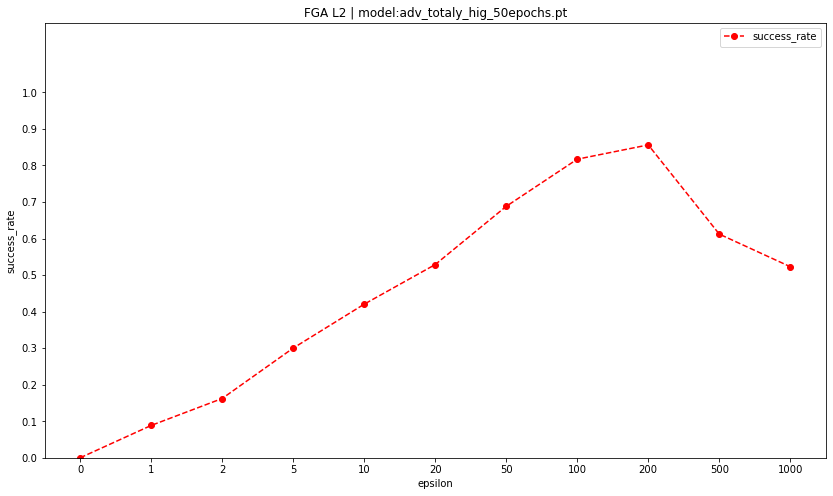

  0%|          | 0/10 [00:00<?, ?it/s]

Perform Attack #3/3: FGA L1


 10%|█         | 1/10 [00:03<00:35,  3.97s/it]

Attack-Parameters:	{'norm': '1', 'epsilon': 100}
Early stopping: 	False (-1)

Successfully attacked:	65
Total attacked: 	1356
Total processed:	1687

Success-Rate: 		0.05
Perturbed Accurracy: 	0.77


  0%|          | 0/27 [00:00<?, ?it/s].99s/it]

Attack-Parameters:	{'norm': '1', 'epsilon': 200}
Early stopping: 	False (-1)

Successfully attacked:	111
Total attacked: 	1356
Total processed:	1687

Success-Rate: 		0.08
Perturbed Accurracy: 	0.74


 30%|███       | 3/10 [00:11<00:27,  3.94s/it]

Attack-Parameters:	{'norm': '1', 'epsilon': 500}
Early stopping: 	False (-1)

Successfully attacked:	240
Total attacked: 	1356
Total processed:	1687

Success-Rate: 		0.18
Perturbed Accurracy: 	0.66


 40%|████      | 4/10 [00:15<00:23,  3.97s/it]

Attack-Parameters:	{'norm': '1', 'epsilon': 1000}
Early stopping: 	False (-1)

Successfully attacked:	391
Total attacked: 	1356
Total processed:	1687

Success-Rate: 		0.29
Perturbed Accurracy: 	0.57


  0%|          | 0/27 [00:00<?, ?it/s].98s/it]

Attack-Parameters:	{'norm': '1', 'epsilon': 2000}
Early stopping: 	False (-1)

Successfully attacked:	543
Total attacked: 	1356
Total processed:	1687

Success-Rate: 		0.4
Perturbed Accurracy: 	0.48


  0%|          | 0/27 [00:00<?, ?it/s].98s/it]

Attack-Parameters:	{'norm': '1', 'epsilon': 5000}
Early stopping: 	False (-1)

Successfully attacked:	752
Total attacked: 	1356
Total processed:	1687

Success-Rate: 		0.55
Perturbed Accurracy: 	0.36


  0%|          | 0/27 [00:00<?, ?it/s].94s/it]

Attack-Parameters:	{'norm': '1', 'epsilon': 10000.0}
Early stopping: 	False (-1)

Successfully attacked:	914
Total attacked: 	1356
Total processed:	1687

Success-Rate: 		0.67
Perturbed Accurracy: 	0.26


 80%|████████  | 8/10 [00:31<00:07,  3.95s/it]

Attack-Parameters:	{'norm': '1', 'epsilon': 20000.0}
Early stopping: 	False (-1)

Successfully attacked:	1090
Total attacked: 	1356
Total processed:	1687

Success-Rate: 		0.8
Perturbed Accurracy: 	0.16


 90%|█████████ | 9/10 [00:35<00:03,  3.99s/it]

Attack-Parameters:	{'norm': '1', 'epsilon': 50000.0}
Early stopping: 	False (-1)

Successfully attacked:	1147
Total attacked: 	1356
Total processed:	1687

Success-Rate: 		0.85
Perturbed Accurracy: 	0.12


100%|██████████| 10/10 [00:39<00:00,  3.98s/it]

Attack-Parameters:	{'norm': '1', 'epsilon': 100000.0}
Early stopping: 	False (-1)

Successfully attacked:	874
Total attacked: 	1356
Total processed:	1687

Success-Rate: 		0.64
Perturbed Accurracy: 	0.29


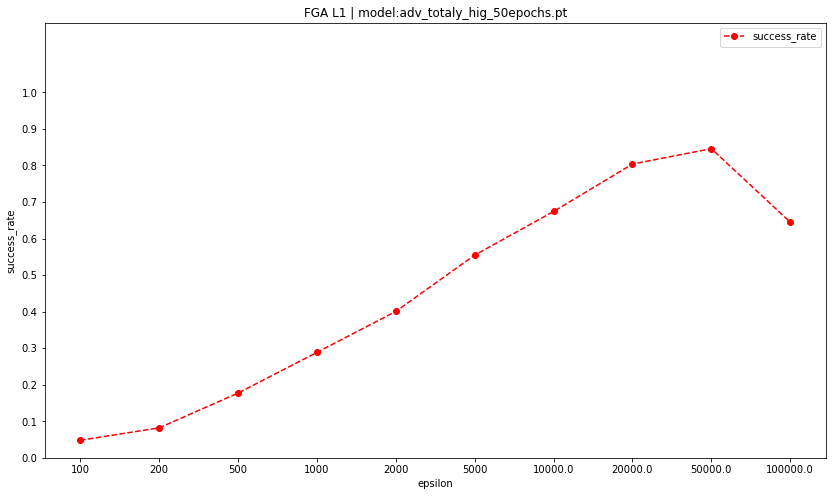

In [7]:
from utils.RobustnessExperiment import RobustnessExperiment
from attacks.FGA_Batch import fast_gradient_attack
from attacks.pgd import ProjectedGradientDescent

exp_config = [{
              "attack_fn": ProjectedGradientDescent, 
              "attack_arg": {"norm":["inf"], "epsilon": [0, 0.0001, 0.0002, 0.0005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1, 10]},
              "meta": {"key_result":"success_rate", "key_config":"epsilon", "title":"FGSM"}
             },
            {
            "attack_fn": ProjectedGradientDescent, 
            "attack_arg": {"norm":["2"], "epsilon": [0, 1, 2, 5, 10, 20, 50, 100, 200, 500, 1000]},
            "meta": {"key_result":"success_rate", "key_config":"epsilon", "title":"FGA L2"}
            },
            {
            "attack_fn": ProjectedGradientDescent, 
            "attack_arg": {"norm":["1"], "epsilon": [100, 200, 500, 1000, 2000, 5000, 1e4, 2e4, 5e4, 1e5]},
            "meta": {"key_result":"success_rate", "key_config":"epsilon", "title":"FGA L1"}
            }]


experiment = RobustnessExperiment(exp_config, title="Test")
experiment.run("/nfs/homedirs/herrmanp/project-4/experiments/notebooks/pascal/adv_totaly_hig_50epochs.pt", M5PLModule)